🧠 Day 3 – SQL via Python: NYC School Data Exploration


# 🔌 Step 1: Import Libraries

In [6]:
import pandas as pd
import psycopg2

# 🔐 Step 2: Connect to the Database

In [7]:
# DB connection setup using hardcoded credentials (for onboarding only)
conn = psycopg2.connect(
    dbname="neondb",
    user="neondb_owner",
    password="npg_CeS9fJg2azZD",
    host="ep-falling-glitter-a5m0j5gk-pooler.us-east-2.aws.neon.tech",
    port="5432",
    sslmode="require"
)
cur = conn.cursor()

# 🔍 Step 3: Run a Test Query

In [9]:
query = "SELECT * FROM nyc_schools.high_school_directory LIMIT 5;"
df = pd.read_sql(query, conn)
df.head()

C:\Users\micha\AppData\Local\Temp\ipykernel_37244\1731849884.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,number_programs,Location 1,Community Board,Council District,Census Tract,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,None,None,...,1,"{'latitude': '40.601989336', 'longitude': '-73...",14,31,100802,20529,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,None,None,...,1,"{'latitude': '40.593593811', 'longitude': '-73...",13,47,306,17616,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,None,None,...,1,"{'latitude': '40.692133704', 'longitude': '-73...",3,36,291,18181,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,None,None,...,1,"{'latitude': '40.822303765', 'longitude': '-73...",9,18,16,11611,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,None,None,...,6,"{'latitude': '40.773670507', 'longitude': '-73...",7,6,151,12420,20,4,19,12


# Step 4: 💻 Data Exploration 

In [10]:

pd.read_sql("""
SELECT table_schema, table_name
FROM information_schema.tables
WHERE table_schema NOT IN ('pg_catalog','information_schema')
ORDER BY 1,2;
""", conn)

C:\Users\micha\AppData\Local\Temp\ipykernel_37244\2616290920.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("""


,table_schema,table_name
0,dependency_example,banks_test_kovalivska_aws
1,dependency_example,departments
2,dependency_example,districts
3,dependency_example,employees
4,dependency_example,neighborhoods
5,nyc_schools,high_school_directory
6,nyc_schools,mytable
7,nyc_schools,school_demographics
8,nyc_schools,school_safety_report
9,public,demo_users


In [5]:
# Example: Count schools by borough
query = """
SELECT borough, COUNT(*) AS school_count
FROM nyc_schools.high_school_directory
GROUP BY borough;
"""
df_result = pd.read_sql(query, conn)
df_result

C:\Users\micha\AppData\Local\Temp\ipykernel_37244\3450537001.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql(query, conn)


,borough,school_count
0,Brooklyn,121
1,Queens,80
2,Staten Island,10
3,Manhattan,106
4,Bronx,118


# Step 5: ✅ Task Queries 

## 🧮 School Distribution — how many schools per borough

In [4]:
q1 = pd.read_sql("""
SELECT h.borough,
       COUNT(DISTINCT h.dbn) AS unique_schools
FROM nyc_schools.high_school_directory h
GROUP BY h.borough
ORDER BY h.borough;
""", conn)

q1

C:\Users\micha\AppData\Local\Temp\ipykernel_23472\2399075928.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q1 = pd.read_sql("""


,borough,unique_schools
0,Bronx,118
1,Brooklyn,121
2,Manhattan,106
3,Queens,80
4,Staten Island,10


- Bar plot for Q1 

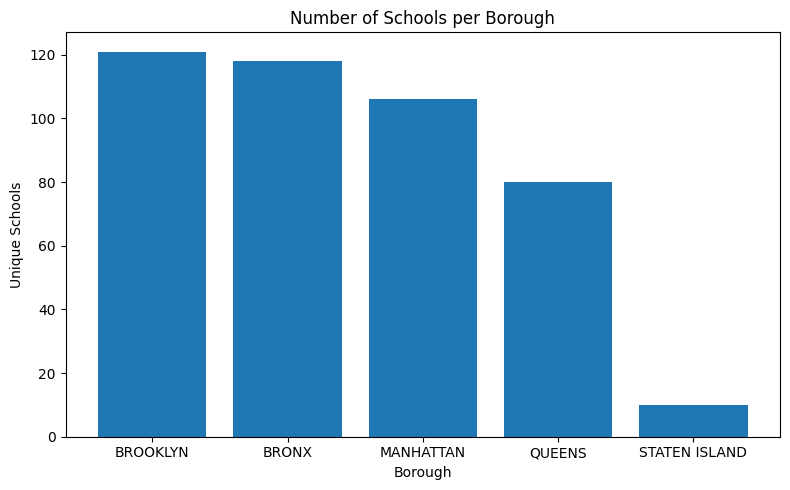

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
plt.bar(q1["borough"], q1["unique_schools"])
plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Unique Schools")
plt.tight_layout()
plt.show()

## 🎓 Average % of ELL per borough (use latest school_year)

In [35]:
q2_latest = pd.read_sql("""
WITH cleaned AS (
  SELECT
    sd.dbn,
    sd.schoolyear,
    -- make a numeric sort key from schoolyear text, e.g., '2016-17' -> 201617
    NULLIF(regexp_replace(sd.schoolyear::text, '[^0-9]', '', 'g'), '')::int AS sy_key,
    NULLIF(regexp_replace(sd.ell_percent::text, '[^0-9.]', '', 'g'), '')::numeric AS ell_num
  FROM nyc_schools.school_demographics sd
),
latest AS (
  SELECT dbn, schoolyear
  FROM (
    SELECT dbn, schoolyear, sy_key,
           ROW_NUMBER() OVER (PARTITION BY dbn ORDER BY sy_key DESC NULLS LAST) AS rn
    FROM cleaned
  ) x
  WHERE rn = 1
)
SELECT
  CASE
    WHEN UPPER(h.borough) IN ('K','BK') THEN 'BROOKLYN'
    WHEN UPPER(h.borough) IN ('X','BX') THEN 'BRONX'
    WHEN UPPER(h.borough) IN ('M')     THEN 'MANHATTAN'
    WHEN UPPER(h.borough) IN ('Q')     THEN 'QUEENS'
    WHEN UPPER(h.borough) IN ('R','SI','STATEN IS','STATEN ISLAND') THEN 'STATEN ISLAND'
    ELSE UPPER(h.borough)
  END AS borough,
  ROUND(AVG(c.ell_num)::numeric, 2) AS avg_ell_percent
FROM cleaned c
JOIN latest l ON l.dbn = c.dbn AND l.schoolyear = c.schoolyear
JOIN nyc_schools.high_school_directory h ON h.dbn = c.dbn
GROUP BY 1
ORDER BY avg_ell_percent DESC;
""", conn)

q2_latest

C:\Users\micha\AppData\Local\Temp\ipykernel_37244\3281678269.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q2_latest = pd.read_sql("""


,borough,avg_ell_percent
0,MANHATTAN,8.81


How many boroughs are there ? 

In [38]:
pd.read_sql("""
SELECT DISTINCT borough
FROM nyc_schools.high_school_directory
ORDER BY 1;
""", conn)

C:\Users\micha\AppData\Local\Temp\ipykernel_37244\2598525865.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("""


,borough
0,Bronx
1,Brooklyn
2,Manhattan
3,Queens
4,Staten Island


Coverage check 

In [42]:
pd.read_sql("""
SELECT h.borough,
       COUNT(DISTINCT h.dbn) AS directory_schools,
       COUNT(DISTINCT sd.dbn) AS schools_with_demographics
FROM nyc_schools.high_school_directory h
LEFT JOIN nyc_schools.school_demographics sd ON sd.dbn = h.dbn
GROUP BY h.borough
ORDER BY 1;
""", conn)

C:\Users\micha\AppData\Local\Temp\ipykernel_37244\491118394.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("""


,borough,directory_schools,schools_with_demographics
0,Bronx,118,0
1,Brooklyn,121,0
2,Manhattan,106,7
3,Queens,80,0
4,Staten Island,10,0


In [41]:
q2_all = pd.read_sql("""
SELECT h.borough,
       ROUND(AVG(sd.ell_percent::numeric), 2) AS avg_ell_percent,
       COUNT(sd.ell_percent) AS schools_used
FROM nyc_schools.high_school_directory h
LEFT JOIN nyc_schools.school_demographics sd ON sd.dbn = h.dbn
GROUP BY h.borough
ORDER BY avg_ell_percent DESC NULLS LAST;
""", conn)

q2_all

C:\Users\micha\AppData\Local\Temp\ipykernel_37244\4246345181.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q2_all = pd.read_sql("""


,borough,avg_ell_percent,schools_used
0,Manhattan,7.57,40
1,Brooklyn,NaN,0
2,Queens,NaN,0
3,Staten Island,NaN,0
4,Bronx,NaN,0


- Bar plot for Q2

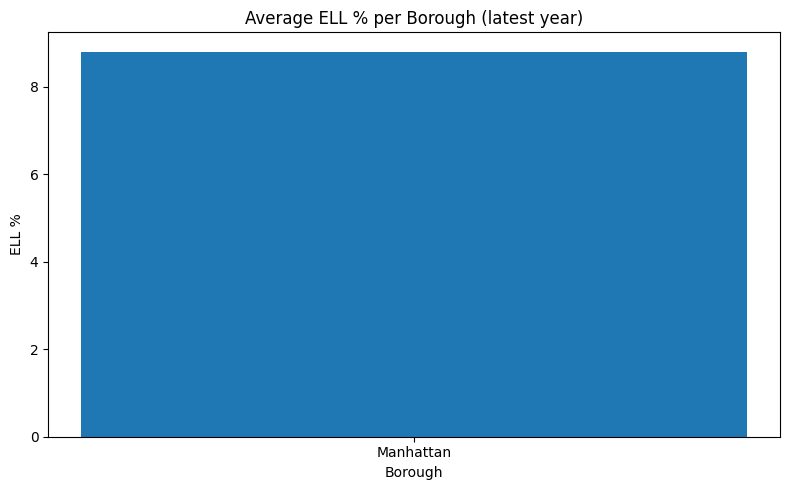

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(q2_latest["borough"], q2_latest["avg_ell_percent"])
plt.title("Average ELL % per Borough (latest year)")
plt.xlabel("Borough")
plt.ylabel("ELL %")
plt.tight_layout()
plt.show()

## 🔗 Top 3 schools per borough by sped_percent

In [9]:
q3 = pd.read_sql("""
WITH cleaned AS (
  SELECT
    h.borough, h.school_name, h.dbn,
    NULLIF(regexp_replace(sd.sped_percent::text,'[^0-9.]','','g'),'')::numeric AS sped_pct
  FROM nyc_schools.high_school_directory h
  JOIN nyc_schools.school_demographics sd USING (dbn)
  WHERE h.borough IS NOT NULL
),
per_school AS (
  SELECT borough, school_name, dbn, MAX(sped_pct) AS max_sped_pct
  FROM cleaned
  WHERE sped_pct IS NOT NULL
  GROUP BY borough, school_name, dbn
),
ranked AS (
  SELECT *,
         ROW_NUMBER() OVER (
           PARTITION BY borough
           ORDER BY max_sped_pct DESC NULLS LAST, school_name
         ) AS rnk
  FROM per_school
)
SELECT borough, rnk AS borough_rank, school_name, dbn, max_sped_pct AS sped_pct
FROM ranked
WHERE rnk <= 3
ORDER BY borough, borough_rank;
""", conn)

q3

C:\Users\micha\AppData\Local\Temp\ipykernel_23472\1096169372.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q3 = pd.read_sql("""


,borough,borough_rank,school_name,dbn,sped_pct
0,Manhattan,1,East Side Community School,01M450,28.8
1,Manhattan,2,Marta Valle High School,01M509,25.9
2,Manhattan,3,Henry Street School for International Studies,01M292,25.1



# Step 6: 🧠 Insights

- School distribution: Brooklyn (121), Bronx (118), Manhattan (106), Queens (80), Staten Island (10).

- ELL (latest year): Only Manhattan has demographics rows in this training DB → Manhattan avg ELL ≈ 8.81% (other boroughs: no data).

- Special education (latest year): Only Manhattan returns results. Top three by SPED%:

a) East Side Community School — 28.8%

b) Marta Valle High School — 25.9%

c) Henry Street School for International Studies — 25.1%